<a href="https://colab.research.google.com/github/STNox/Deep-Learning/blob/master/2.%20Model/01_%ED%8F%90%EC%95%94%ED%99%98%EC%9E%90%EC%83%9D%EC%A1%B4%EB%A5%A0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 폐암환자 생존률 예측

In [1]:
!ls -l

total 552
-rw-r--r-- 1 root root  49082 Feb  9 00:36 housing.csv
-rw-r--r-- 1 root root   4551 Feb  9 00:36 iris.csv
-rw-r--r-- 1 root root  23279 Feb  9 00:36 pima-indians-diabetes.csv
drwxr-xr-x 1 root root   4096 Feb  4 15:26 sample_data
-rw-r--r-- 1 root root  87776 Feb  9 00:36 sonar.csv
-rw-r--r-- 1 root root  21257 Feb  9 00:36 ThoraricSurgery.csv
-rw-r--r-- 1 root root 361279 Feb  9 00:36 wine.csv


### 데이터 탐색

In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('ThoraricSurgery.csv', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,293,1,3.80,2.80,0,0,0,0,0,0,12,0,0,0,1,0,62,0
1,1,2,2.88,2.16,1,0,0,0,1,1,14,0,0,0,1,0,60,0
2,8,2,3.19,2.50,1,0,0,0,1,0,11,0,0,1,1,0,66,1
3,14,2,3.98,3.06,2,0,0,0,1,1,14,0,0,0,1,0,80,1
4,17,2,2.21,1.88,0,0,1,0,0,0,12,0,0,0,1,0,56,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470 entries, 0 to 469
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       470 non-null    int64  
 1   1       470 non-null    int64  
 2   2       470 non-null    float64
 3   3       470 non-null    float64
 4   4       470 non-null    int64  
 5   5       470 non-null    int64  
 6   6       470 non-null    int64  
 7   7       470 non-null    int64  
 8   8       470 non-null    int64  
 9   9       470 non-null    int64  
 10  10      470 non-null    int64  
 11  11      470 non-null    int64  
 12  12      470 non-null    int64  
 13  13      470 non-null    int64  
 14  14      470 non-null    int64  
 15  15      470 non-null    int64  
 16  16      470 non-null    int64  
 17  17      470 non-null    int64  
dtypes: float64(2), int64(16)
memory usage: 66.2 KB


In [5]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
count,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000
mean,235.500000,3.095745,3.281638,4.568702,0.780851,0.065957,0.144681,0.065957,0.687234,0.165957,11.736170,0.074468,0.004255,0.017021,0.821277,0.004255,62.534043,0.148936
std,135.821574,0.722309,0.871395,11.767857,0.535375,0.248472,0.352154,0.248472,0.464114,0.372439,0.702243,0.262811,0.065163,0.129488,0.383529,0.065163,8.706902,0.356405
min,1.000000,1.000000,1.440000,0.960000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,0.000000
25%,118.250000,3.000000,2.600000,1.960000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000,0.000000,0.000000,0.000000,1.000000,0.000000,57.000000,0.000000
50%,235.500000,3.000000,3.160000,2.400000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,12.000000,0.000000,0.000000,0.000000,1.000000,0.000000,62.000000,0.000000
75%,352.750000,3.000000,3.807500,3.080000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,12.000000,0.000000,0.000000,0.000000,1.000000,0.000000,69.000000,0.000000
max,470.000000,8.000000,6.300000,86.300000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,14.000000,1.000000,1.000000,1.000000,1.000000,1.000000,87.000000,1.000000


### 데이터셋 만들기

In [6]:
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [7]:
seed = 2021
np.random.seed(seed)
tf.random.set_seed(seed)

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(df.iloc[:, :-1].values, df.iloc[:, -1].values, test_size=0.25, stratify=df.iloc[:, -1].values, random_state=seed)
X_train.shape, X_test.shape

((352, 17), (118, 17))

### 모델 정의

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [10]:
model = Sequential()
model.add(Dense(30, input_shape=(17,), activation='relu')) # input_shape은 feature 개수에 따름, 30은 hidden layer의 node 개수
model.add(Dense(1, activation='sigmoid')) # output layer, 이진 분류이므로 sigmoid
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                540       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 31        
Total params: 571
Trainable params: 571
Non-trainable params: 0
_________________________________________________________________


### 모델 컴파일(실행환경 설정)

In [11]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

### 모델 학습

In [12]:
model.fit(X_train, Y_train, epochs=30, validation_split=0.2, batch_size=10)

Epoch 1/30
29/29 [==============================] - 1s 18ms/step - loss: 6.7828 - accuracy: 0.3405 - val_loss: 2.6058 - val_accuracy: 0.7042
Epoch 2/30
29/29 [==============================] - 0s 2ms/step - loss: 1.2124 - accuracy: 0.8427 - val_loss: 0.9057 - val_accuracy: 0.7183
Epoch 3/30
29/29 [==============================] - 0s 2ms/step - loss: 0.5119 - accuracy: 0.8287 - val_loss: 0.6953 - val_accuracy: 0.7606
Epoch 4/30
29/29 [==============================] - 0s 2ms/step - loss: 0.5265 - accuracy: 0.8299 - val_loss: 0.6481 - val_accuracy: 0.7324
Epoch 5/30
29/29 [==============================] - 0s 6ms/step - loss: 0.4364 - accuracy: 0.8542 - val_loss: 0.6261 - val_accuracy: 0.7606
Epoch 6/30
29/29 [==============================] - 0s 2ms/step - loss: 0.3771 - accuracy: 0.8919 - val_loss: 0.6137 - val_accuracy: 0.7746
Epoch 7/30
29/29 [==============================] - 0s 3ms/step - loss: 0.4348 - accuracy: 0.8544 - val_loss: 0.7721 - val_accuracy: 0.7746
Epoch 8/30
29/29 [=

### 정확도 평가

In [13]:
acc = model.evaluate(X_test, Y_test)
acc

4/4 [==============================] - 0s 4ms/step - loss: 0.4661 - accuracy: 0.8475


[0.46611106395721436, 0.8474576473236084]

In [14]:
print(f'Accuracy: {acc[1]:.4f}')

Accuracy: 0.8475


### 정규화

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df)
scaled_df = scaler.transform(df)
scaled_df

array([[0.62260128, 0.        , 0.48559671, ..., 0.        , 0.62121212,
        0.        ],
       [0.        , 0.14285714, 0.2962963 , ..., 0.        , 0.59090909,
        0.        ],
       [0.01492537, 0.14285714, 0.3600823 , ..., 0.        , 0.68181818,
        1.        ],
       ...,
       [0.86353945, 0.71428571, 0.80658436, ..., 0.        , 0.62121212,
        0.        ],
       [0.05117271, 1.        , 0.59259259, ..., 0.        , 0.56060606,
        1.        ],
       [0.95095949, 1.        , 0.77366255, ..., 0.        , 0.42424242,
        0.        ]])

In [16]:
type(scaled_df)

numpy.ndarray

In [17]:
s_df = pd.DataFrame(data=scaled_df)
s_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.622601,0.000000,0.485597,0.021561,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,0.0,0.0,1.0,0.0,0.621212,0.0
1,0.000000,0.142857,0.296296,0.014061,0.5,0.0,0.0,0.0,1.0,1.0,1.000000,0.0,0.0,0.0,1.0,0.0,0.590909,0.0
2,0.014925,0.142857,0.360082,0.018045,0.5,0.0,0.0,0.0,1.0,0.0,0.000000,0.0,0.0,1.0,1.0,0.0,0.681818,1.0
3,0.027719,0.142857,0.522634,0.024607,1.0,0.0,0.0,0.0,1.0,1.0,1.000000,0.0,0.0,0.0,1.0,0.0,0.893939,1.0
4,0.034115,0.142857,0.158436,0.010780,0.0,0.0,1.0,0.0,0.0,0.0,0.333333,0.0,0.0,0.0,1.0,0.0,0.530303,0.0


In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(s_df.iloc[:, :-1].values, s_df.iloc[:, -1].values, test_size=0.25, stratify=s_df.iloc[:, -1].values, random_state=seed)
X_train.shape, X_test.shape

((352, 17), (118, 17))

In [19]:
model = Sequential()
model.add(Dense(24, input_shape=(17,), activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid')) # output layer, 이진 분류이므로 sigmoid
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 24)                432       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                250       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 11        
Total params: 693
Trainable params: 693
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [24]:
history = model.fit(X_train, Y_train, batch_size=10, epochs=30, validation_split=0.2)

Epoch 1/30
29/29 [==============================] - 0s 4ms/step - loss: 0.3297 - accuracy: 0.8648 - val_loss: 0.4962 - val_accuracy: 0.8028
Epoch 2/30
29/29 [==============================] - 0s 2ms/step - loss: 0.3270 - accuracy: 0.8648 - val_loss: 0.4973 - val_accuracy: 0.8028
Epoch 3/30
29/29 [==============================] - 0s 3ms/step - loss: 0.3254 - accuracy: 0.8648 - val_loss: 0.4955 - val_accuracy: 0.8028
Epoch 4/30
29/29 [==============================] - 0s 3ms/step - loss: 0.3236 - accuracy: 0.8683 - val_loss: 0.4931 - val_accuracy: 0.8028
Epoch 5/30
29/29 [==============================] - 0s 3ms/step - loss: 0.3204 - accuracy: 0.8683 - val_loss: 0.4948 - val_accuracy: 0.8028
Epoch 6/30
29/29 [==============================] - 0s 3ms/step - loss: 0.3213 - accuracy: 0.8683 - val_loss: 0.5087 - val_accuracy: 0.8028
Epoch 7/30
29/29 [==============================] - 0s 2ms/step - loss: 0.3174 - accuracy: 0.8683 - val_loss: 0.5041 - val_accuracy: 0.8028
Epoch 8/30
29/29 [==

In [22]:
acc = model.evaluate(X_test, Y_test)
acc

4/4 [==============================] - 0s 2ms/step - loss: 0.4697 - accuracy: 0.8475


[0.4697074592113495, 0.8474576473236084]

In [23]:
print(f'Accuracy: {acc[1]:.4f}')

Accuracy: 0.8475


### 학습 과정 시각화

In [29]:
history.history['accuracy'][:3]

[0.8647686839103699, 0.8647686839103699, 0.8647686839103699]

In [30]:
history.history['loss'][:3]

[0.3296869695186615, 0.3270350992679596, 0.32540687918663025]

In [31]:
history.history['val_accuracy'][:3]

[0.8028169274330139, 0.8028169274330139, 0.8028169274330139]

In [32]:
history.history['val_loss'][:3]

[0.4961651563644409, 0.49733367562294006, 0.4955447018146515]

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline

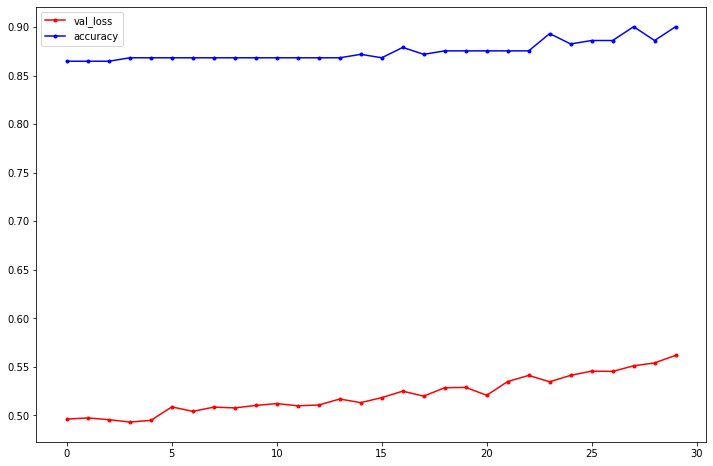

In [35]:
y_vloss = history.history['val_loss']
y_acc = history.history['accuracy']
x_len = np.arange(len(y_acc))
plt.figure(figsize=(12, 8))
plt.plot(x_len, y_vloss, 'o-', c='red', markersize=3, label='val_loss')
plt.plot(x_len, y_acc, 'o-', c='blue', markersize=3, label='accuracy')
plt.legend()
plt.show()